In [1]:
import datetime
import dateutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
sb.set(style="darkgrid")

In [2]:
def createAmortized(principal, payment, apr, beginningDate, oneTimePayment=0, periodicPayment=0):
    output = {
        'ppmt': [],
        'ipmt': [],
        'principal': []
    }
    dateArray = []
    currentDate = beginningDate
    currentPrincipal = principal
    while(currentPrincipal > 0.01):
        previousDate = currentDate
        currentDate += dateutil.relativedelta.relativedelta(months=1)
        interestPaid = currentPrincipal * (apr/12)
        
        #Calculate additional payment if any
        additionalPayment = 0
        if(currentDate > datetime.date.today()):
            additionalPayment += periodicPayment
        if(previousDate <= datetime.date.today() <= currentDate):
            additionalPayment += oneTimePayment
        
        principalPaid = (payment + additionalPayment) - interestPaid
        if(currentPrincipal - principalPaid < 0.00):
            principalPaid = currentPrincipal
            currentPrincipal = 0.00
        else:
            currentPrincipal -= principalPaid
        dateArray.append(currentDate)
        output['ppmt'].append(principalPaid)
        output['ipmt'].append(interestPaid)
        output['principal'].append(currentPrincipal)
    return pd.DataFrame(output, index=dateArray)

def totalInterest(df):
    return np.sum(df['ipmt'])

def endDate(df):
    return df.index.max()

def periodicPaymentReport(principal, payment, apr, beginningDate, start, end, step):
    periodicPaymentArray = []
    interestArray = []
    endDateArray = []
    currentPeriodicPayment = start
    while(currentPeriodicPayment <= end):
        periodicPaymentArray.append(currentPeriodicPayment)
        mod_df = createAmortized(principal, payment, apr, beginningDate, periodicPayment = currentPeriodicPayment)
        interestArray.append(totalInterest(mod_df))
        endDateArray.append(endDate(mod_df))
        currentPeriodicPayment += step
    output = pd.DataFrame({'totalInterest': interestArray, 'endDate': endDateArray}, index=periodicPaymentArray)
    original_df = createAmortized(principal, payment, apr, beginningDate)
    originalInterest = totalInterest(original_df)
    originalEndDate = endDate(original_df)
    output['interest_difference'] = originalInterest - output['totalInterest']
    output['endDate_difference'] = originalEndDate - output['endDate']
    return output

def oneTimePaymentReport(principal, payment, apr, beginningDate, start, end, step):
    oneTimeArray = []
    interestArray = []
    endDateArray = []
    currentOneTimePayment = start
    while(currentOneTimePayment <= end):
        oneTimeArray.append(currentOneTimePayment)
        mod_df = createAmortized(principal, payment, apr, beginningDate, oneTimePayment = currentOneTimePayment)
        interestArray.append(totalInterest(mod_df))
        endDateArray.append(endDate(mod_df))
        currentOneTimePayment += step
    output = pd.DataFrame({'totalInterest': interestArray, 'endDate': endDateArray}, index=oneTimeArray)
    original_df = createAmortized(principal, payment, apr, beginningDate)
    originalInterest = totalInterest(original_df)
    originalEndDate = endDate(original_df)
    output['interest_difference'] = originalInterest - output['totalInterest']
    output['endDate_difference'] = originalEndDate - output['endDate']
    return output

def report(principal, payment, apr, beginningDate, oneTimePayment=0, periodicPayment=0):
    additionalPayment = (oneTimePayment != 0 or periodicPayment != 0)
    df = createAmortized(principal=principal, payment=payment, apr=apr, beginningDate=beginningDate)
    df_modified = None
    plt_items = ['ppmt', 'ipmt']
    plt2_items = ['principal']
    if additionalPayment:
        df_modified = createAmortized(principal=principal, payment=payment, apr=apr, beginningDate=beginningDate, oneTimePayment=oneTimePayment, periodicPayment=periodicPayment)
        df['ppmt_mod'] = df_modified['ppmt']
        df['ipmt_mod'] = df_modified['ipmt']
        df['principal_mod'] = df_modified['principal']
        plt_items.append('ppmt_mod')
        plt_items.append('ipmt_mod')
        plt2_items.append('principal_mod')
        
    df[plt_items].plot()
    plt.figure()
    df[plt2_items].plot()
    
    totalInterest_orig = totalInterest(df)
    endDate_orig = endDate(df)
    if additionalPayment:
        
        print("Original Data:")
    print("Total Interest: %d" % totalInterest_orig)
    print("End Date: %s" % endDate_orig)
    
    if additionalPayment:
        totalInterest_mod = totalInterest(df_modified)
        endDate_mod = endDate(df_modified)
        print("")
        print("Modified Data:")
        print("Total Interest: %d" % totalInterest_mod)
        print("End Date: %s" % endDate_mod)
        print("")
        print("Difference in total interest: %d" % (totalInterest_orig - totalInterest_mod))
        print("Difference in end date: %s" % (endDate_orig - endDate_mod))

## House Loan

<div>Beginning Principal: 188000.00</div>
<div>APR: 3.75%</div>
<div>Beginning Date: Fri Oct 27 2017</div>
<div>Payment: $870.66</div>

In [3]:
createAmortized(principal=188000.00, payment=870.66, apr=0.0375, beginningDate=datetime.date(2017, 10, 27))

,ppmt,ipmt,principal
2017-11-27,283.160000,587.500000,187716.840000
2017-12-27,284.044875,586.615125,187432.795125
2018-01-27,284.932515,585.727485,187147.862610
2018-02-27,285.822929,584.837071,186862.039680
2018-03-27,286.716126,583.943874,186575.323554
2018-04-27,287.612114,583.047886,186287.711441
2018-05-27,288.510902,582.149098,185999.200539
2018-06-27,289.412498,581.247502,185709.788040
2018-07-27,290.316912,580.343088,185419.471128
2018-08-27,291.224153,579.435847,185128.246975


Total Interest: 125435
End Date: 2047-10-27


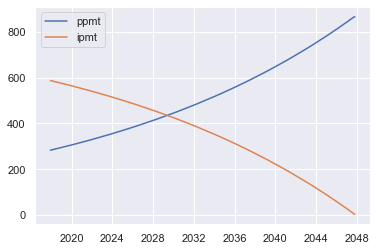

<Figure size 432x288 with 0 Axes>

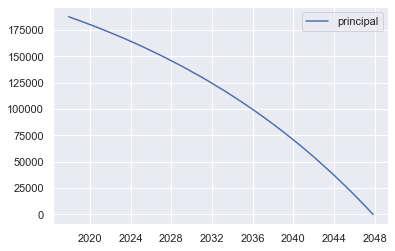

In [4]:
report(principal=188000.00, payment=870.66, apr=0.0375, beginningDate=datetime.date(2017, 10, 27))

Original Data:
Total Interest: 125435
End Date: 2047-10-27

Modified Data:
Total Interest: 81864
End Date: 2037-12-27

Difference in total interest: 43570
Difference in end date: 3591 days, 0:00:00


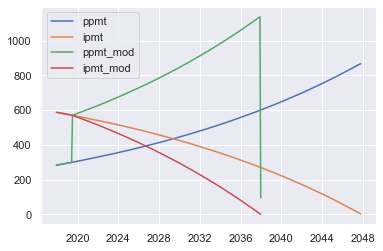

<Figure size 432x288 with 0 Axes>

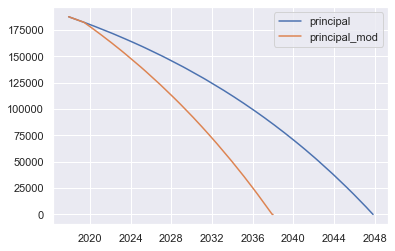

In [5]:
report(principal=188000.00, payment=870.66, apr=0.0375, beginningDate=datetime.date(2017, 10, 27), periodicPayment=270.00)

Original Data:
Total Interest: 125435
End Date: 2047-10-27

Modified Data:
Total Interest: 119888
End Date: 2047-01-27

Difference in total interest: 5547
Difference in end date: 273 days, 0:00:00


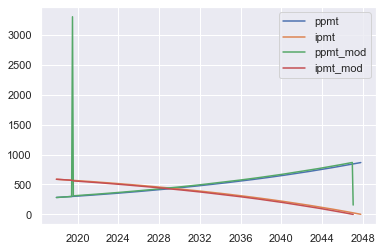

<Figure size 432x288 with 0 Axes>

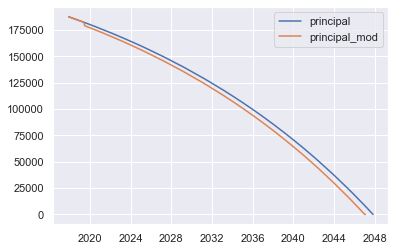

In [6]:
report(principal=188000.00, payment=870.66, apr=0.0375, beginningDate=datetime.date(2017, 10, 27), oneTimePayment=3000.00)

,totalInterest,endDate,interest_difference,endDate_difference
0,125435.815428,2047-10-27,0.000000,0 days
50,113540.882831,2045-03-27,11894.932597,944 days
100,103980.442815,2043-01-27,21455.372613,1734 days
150,96111.218872,2041-04-27,29324.596556,2374 days
200,89510.713397,2039-09-27,35925.102030,2952 days
250,83888.281232,2038-05-27,41547.534195,3440 days
300,79037.463961,2037-03-27,46398.351466,3866 days
350,74807.442644,2036-03-27,50628.372784,4231 days
400,71083.558172,2035-04-27,54352.257256,4566 days
450,67779.311472,2034-07-27,57656.503955,4840 days


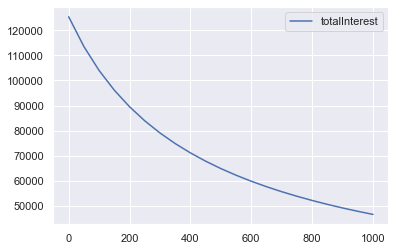

In [7]:
periodic_df = periodicPaymentReport(principal=188000.00, payment=870.66, apr=0.0375, beginningDate=datetime.date(2017, 10, 27), start=0, end=1000, step=50)
periodic_df[['totalInterest']].plot()
periodic_df

,totalInterest,endDate,interest_difference,endDate_difference
0,125435.815428,2047-10-27,0.000000,0 days
1000,123557.699900,2047-07-27,1878.115528,92 days
2000,121708.727296,2047-04-27,3727.088131,183 days
3000,119888.377686,2047-01-27,5547.437741,273 days
4000,118096.209578,2046-09-27,7339.605849,395 days
5000,116332.050266,2046-06-27,9103.765162,487 days
6000,114594.912308,2046-03-27,10840.903119,579 days
7000,112884.305416,2045-12-27,12551.510012,669 days
8000,111199.746087,2045-09-27,14236.069341,760 days
9000,109540.757528,2045-06-27,15895.057900,852 days


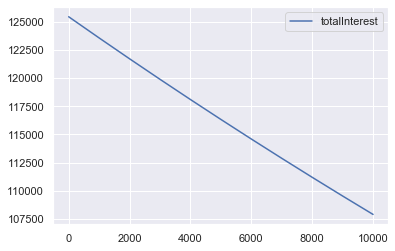

In [8]:
oneTime_df = oneTimePaymentReport(principal=188000.00, payment=870.66, apr=0.0375, beginningDate=datetime.date(2017, 10, 27), start=0, end=10000, step=1000)
oneTime_df[['totalInterest']].plot()
oneTime_df